# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow.

Computer Vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/tree/main/extras

> **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-10-21 12:45:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.200.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   249MB/s    in 0.4s    

2022-10-21 12:45:33 (249 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['979110.jpg']
Image shape: (512, 512, 3)


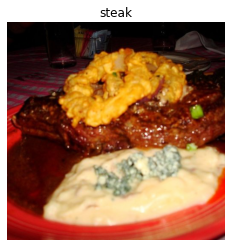

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 12,   1,   0],
        [ 12,   1,   0],
        [ 12,   1,   0],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 12,   1,   0],
        [ 12,   1,   0],
        [ 13,   2,   0],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 13,   2,   0],
        [ 13,   2,   0],
        [ 13,   2,   0],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[122,   6,   7],
        [122,   6,   7],
        [122,   6,   7],
        ...,
        [152, 119, 126],
        [157, 122, 129],
        [159, 124, 131]],

       [[122,   6,   7],
        [123,   7,   8],
        [123,   7,   8],
        ...,
        [154, 121, 132],
        [156, 123, 134],
        [159, 126, 137]],

       [[122,   6,   7],
        [123,   7,   8],
        [124,   8,   9],
        ...,
        [150, 118, 13

In [11]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **noramlize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [12]:
# Get the all the pixel values between 0 & 1
img/255.

array([[[0.04705882, 0.00392157, 0.        ],
        [0.04705882, 0.00392157, 0.        ],
        [0.04705882, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       [[0.04705882, 0.00392157, 0.        ],
        [0.04705882, 0.00392157, 0.        ],
        [0.05098039, 0.00784314, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       [[0.05098039, 0.00784314, 0.        ],
        [0.05098039, 0.00784314, 0.        ],
        [0.05098039, 0.00784314, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.47843137, 0.02352941, 0.02745098],
        [0.47843137, 0.02352941, 0.02745098],
        [0.47843137, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Proprocess the data (get all of the pixel values between 0 & 1, also called scaling/normalizing)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                           padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")                                 
])

# Compile our CNN model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the CNN model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 27s 329ms/step - loss: 0.5701 - accuracy: 0.6967 - val_loss: 0.3694 - val_accuracy: 0.8380
Epoch 2/10
47/47 [==============================] - 9s 200ms/step - loss: 0.4373 - accuracy: 0.7993 - val_loss: 0.3265 - val_accuracy: 0.8420
Epoch 3/10
47/47 [==============================] - 9s 199ms/step - loss: 0.4137 - accuracy: 0.8227 - val_loss: 0.3349 - val_accuracy: 0.8720
Epoch 4/10
47/47 [==============================] - 9s 200ms/step - loss: 0.3770 - accuracy: 0.8380 - val_loss: 0.2980 - val_accuracy: 0.8700
Epoch 5/10
47/47 [==============================] - 9s 199ms/step - loss: 0.3314 - accuracy: 0.8600 - val_loss: 0.3031 - val_accuracy: 0.8680
Epoch 6/10
47/47 [==============================] - 9s 197ms/step - loss: 0.2935 - accuracy: 0.8833 - val_loss: 0.2768 - val_accuracy: 0.8940
Epoch 7/10
47/47 [==============================] - 11s 227ms/st

> **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure yo're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelator -> GPU (you may have to rerun some cells below).

In [14]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

> **Practice/exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with theirs: https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.83803&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                         
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 3.2544 - accuracy: 0.5193 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000


In [16]:
# Get a summary of model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [17]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                              
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 3.1407 - accuracy: 0.6273 - val_loss: 1.0566 - val_accuracy: 0.6620
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 1.3731 - accuracy: 0.6800 - val_loss: 0.5550 - val_accuracy: 0.7420
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.7265 - accuracy: 0.7193 - val_loss: 1.2971 - val_accuracy: 0.6900
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.9455 - accuracy: 0.7180 - val_loss: 1.7250 - val_accuracy: 0.5160
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.8358 - accuracy: 0.7273 - val_loss: 0.7792 - val_accuracy: 0.7040


In [18]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


> **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitevly, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

## Binary Classificaiton: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepare it for our model, the main step here was scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3142045.jpg']
Image shape: (512, 512, 3)
['131561.jpg']
Image shape: (512, 384, 3)


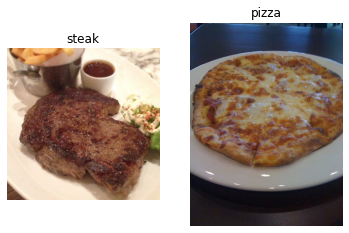

In [19]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [20]:
# Define directory dataset paths
tran_dir = "pizza_steak/train/"
test_dir = "pizza_steak/train/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hint could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health...

In [21]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data yo're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [23]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [24]:
# How many batches are there?
len(train_data)

47

In [25]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.08627451, 0.04705883, 0.0509804 ],
          [0.1137255 , 0.06666667, 0.06666667],
          [0.14901961, 0.09019608, 0.07843138],
          ...,
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412]],
 
         [[0.1254902 , 0.09019608, 0.05490196],
          [0.16862746, 0.11764707, 0.08235294],
          [0.21568629, 0.16078432, 0.11764707],
          ...,
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412]],
 
         [[0.13725491, 0.10196079, 0.04313726],
          [0.1764706 , 0.12941177, 0.07450981],
          [0.227451  , 0.16470589, 0.10588236],
          ...,
          [0.05882353, 0.02352941, 0.03529412],
          [0.05882353, 0.02352941, 0.03529412],
          [0.05882353, 0.02352941, 0.03529412]],
 
         ...,
 
         [[0.9490197 , 0.9607844 , 0.8941177 ],
          [0.99215

In [26]:
images[7].shape

(224, 224, 3)

In [27]:
# View the first batch of labels
labels

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you set up when beginning of a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required. (e.g. look at which current model is performing best in the field for your problem).

In [28]:
# Make a creating our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, MaxPool2D, Conv2D, Activation
from tensorflow.keras import Sequential

In [29]:
# Create the model (this will be our baseline, a 3D layer convolutional neural network)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=3, # the size of the sliding window going across an input
         strides=1, # the size of the step the sliding window takes accross an input
         padding="valid", # if "same", output shape is same as input shape, 
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only one output neuron)                    
])

**Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 15-20 minutes: https://poloclub.github.io/cnn-explainer/

In [30]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [31]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [32]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 47)

In [33]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 294ms/step - loss: 1.1300 - accuracy: 0.6753 - val_loss: 0.4846 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 13s 289ms/step - loss: 0.4519 - accuracy: 0.8080 - val_loss: 0.3599 - val_accuracy: 0.8613
Epoch 3/5
47/47 [==============================] - 13s 288ms/step - loss: 0.3218 - accuracy: 0.8733 - val_loss: 0.1926 - val_accuracy: 0.9393
Epoch 4/5
47/47 [==============================] - 13s 286ms/step - loss: 0.1974 - accuracy: 0.9353 - val_loss: 0.0788 - val_accuracy: 0.9840
Epoch 5/5
47/47 [==============================] - 13s 289ms/step - loss: 0.0654 - accuracy: 0.9840 - val_loss: 0.0253 - val_accuracy: 0.9973


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

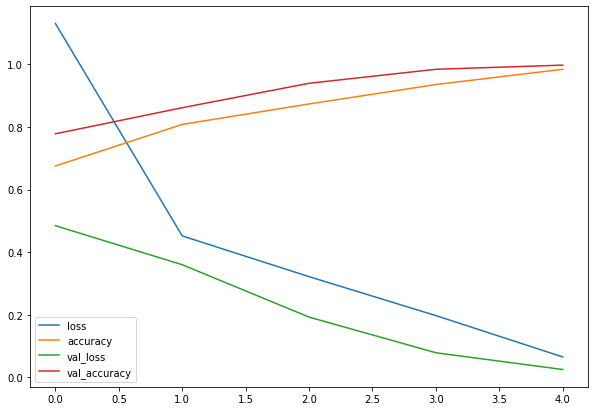

In [34]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [35]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

> **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

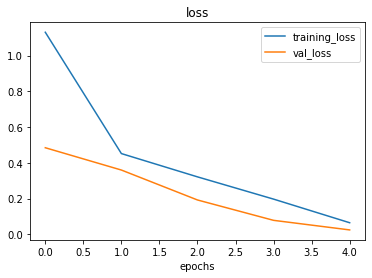

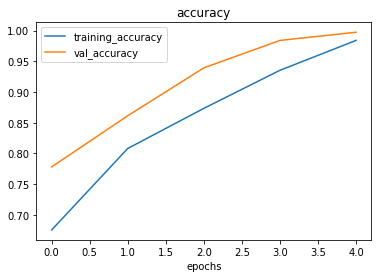

In [36]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

> **Note:** Ideally the two loss curves (training and validation) will be very similar to each oter (training loss and validation loss decreasing at similar rates), when there are large differences your model may be overfitting.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conf filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> **Note:** Reducing overfitting is also known as **regularization**.

In [37]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                 
])

In [38]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [39]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 284ms/step - loss: 0.6176 - accuracy: 0.6613 - val_loss: 0.4982 - val_accuracy: 0.7907
Epoch 2/5
47/47 [==============================] - 13s 279ms/step - loss: 0.4753 - accuracy: 0.7807 - val_loss: 0.4356 - val_accuracy: 0.8047
Epoch 3/5
47/47 [==============================] - 13s 282ms/step - loss: 0.4205 - accuracy: 0.8120 - val_loss: 0.3860 - val_accuracy: 0.8293
Epoch 4/5
47/47 [==============================] - 13s 282ms/step - loss: 0.4126 - accuracy: 0.8060 - val_loss: 0.4002 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 13s 282ms/step - loss: 0.3729 - accuracy: 0.8433 - val_loss: 0.3375 - val_accuracy: 0.8607


In [40]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

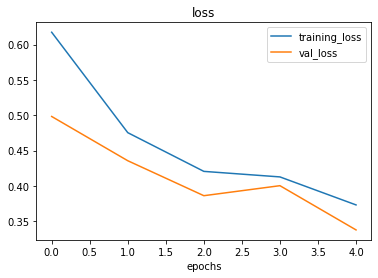

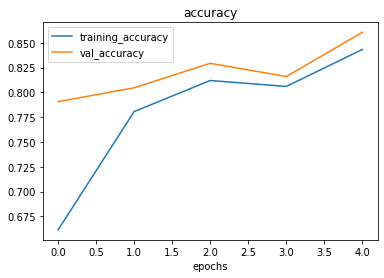

In [41]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [42]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomy on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting rotation of the image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [43]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 1500 images belonging to 2 classes.


> **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [44]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: Labels aren't augmented... only data (images)

showing image number: 14


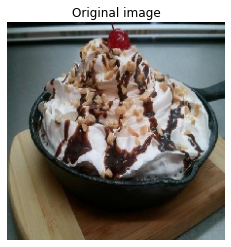

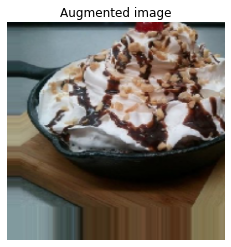

In [45]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've seen what augmented data looks like, let's build a model and see how it learns on augmented data.

In [46]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                      
])

In [47]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [48]:
# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 562ms/step - loss: 0.7031 - accuracy: 0.4667 - val_loss: 0.6806 - val_accuracy: 0.6600
Epoch 2/5
47/47 [==============================] - 26s 549ms/step - loss: 0.6920 - accuracy: 0.5813 - val_loss: 0.6727 - val_accuracy: 0.7173
Epoch 3/5
47/47 [==============================] - 30s 637ms/step - loss: 0.6743 - accuracy: 0.6333 - val_loss: 0.6340 - val_accuracy: 0.7407
Epoch 4/5
47/47 [==============================] - 27s 572ms/step - loss: 0.7057 - accuracy: 0.5233 - val_loss: 0.6411 - val_accuracy: 0.6060
Epoch 5/5
47/47 [==============================] - 26s 551ms/step - loss: 0.6702 - accuracy: 0.6000 - val_loss: 0.6034 - val_accuracy: 0.6633


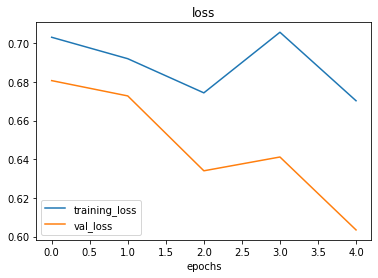

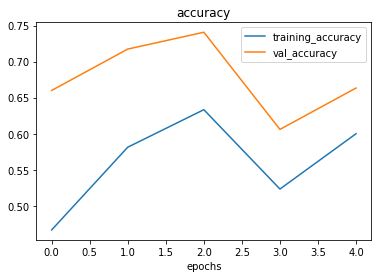

In [49]:
# Check our models training curves
plot_loss_curves(history_6)

In [50]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time                                                                        

Found 1500 images belonging to 2 classes.


Let's shuffle our augmented training data and train another model(the same as before) on it and see what happens.

In [51]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                  
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6304 - accuracy: 0.6380 - val_loss: 0.5275 - val_accuracy: 0.7593
Epoch 2/5
47/47 [==============================] - 25s 541ms/step - loss: 0.4975 - accuracy: 0.7607 - val_loss: 0.4309 - val_accuracy: 0.7993
Epoch 3/5
47/47 [==============================] - 26s 547ms/step - loss: 0.4741 - accuracy: 0.7767 - val_loss: 0.4367 - val_accuracy: 0.8173
Epoch 4/5
47/47 [==============================] - 26s 547ms/step - loss: 0.4554 - accuracy: 0.7920 - val_loss: 0.4007 - val_accuracy: 0.8147
Epoch 5/5
47/47 [==============================] - 26s 566ms/step - loss: 0.4691 - accuracy: 0.8000 - val_loss: 0.3996 - val_accuracy: 0.8187


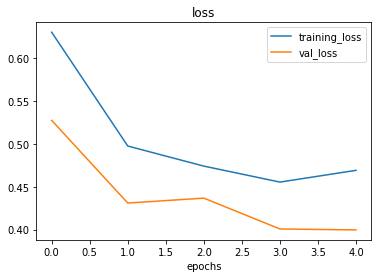

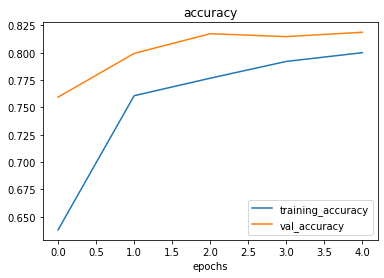

In [52]:
# Plot loss curves
plot_loss_curves(history_7)

> **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/ `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.

> **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our own custom data

In [53]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-10-21 12:56:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2022-10-21 12:56:15 (101 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



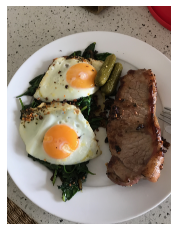

In [54]:
# View our example image
import matplotlib.image as mp
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [55]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [56]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [57]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the real file into a tensor
  img = tf.image.decode_image(img, channels=3)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [58]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [59]:
model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 172ms/step


array([[0.9264464]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediciton?

In [60]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [61]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 16ms/step


array([[0.9264464]], dtype=float32)

In [62]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [63]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediciton with model and plots the image with the predicted class at the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 16ms/step


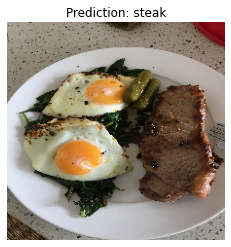

In [64]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza 🍕

--2022-10-21 12:56:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-10-21 12:56:20 (277 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 19ms/step


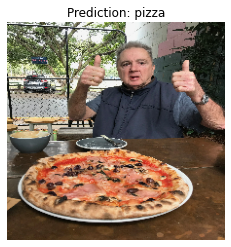

In [65]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (give it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [66]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-10-21 12:56:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   106MB/s    in 4.8s    

2022-10-21 12:56:25 (104 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [67]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [68]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [69]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2493954.jpg']
Image shape: (512, 512, 3)


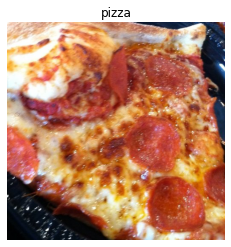

In [70]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [71]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

 # Rescale
 train_datagen = ImageDataGenerator(rescale=1/255.)
 test_datagen = ImageDataGenerator(rescale=1/255.)

 # Load data in from directories and turn it into batches
 train_dir = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")
 
 test_dir = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start wtih a baseline)

We've been talking a lot about the [CNN explainer website](https://poloclub.github.io/cnn-explainer/)... how about we just take their model (also on 10 classes) and use it for our problem...?

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function                    
])

# Compile the model
model_8.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

### 4. Fit a model

In [73]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 291ms/step - loss: 0.9644 - accuracy: 0.4553 - val_loss: 0.6103 - val_accuracy: 0.6307
Epoch 2/5
47/47 [==============================] - 13s 285ms/step - loss: 0.6071 - accuracy: 0.6787 - val_loss: 0.6140 - val_accuracy: 0.5960
Epoch 3/5
47/47 [==============================] - 13s 283ms/step - loss: 0.6082 - accuracy: 0.7000 - val_loss: 0.5170 - val_accuracy: 0.7373
Epoch 4/5
47/47 [==============================] - 13s 279ms/step - loss: 0.5340 - accuracy: 0.7313 - val_loss: 0.4739 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 13s 279ms/step - loss: 0.5095 - accuracy: 0.7633 - val_loss: 0.4347 - val_accuracy: 0.8127


### 5. Evaluate the model

In [74]:
# Evaluate on the test data
model_8.evaluate(test_data)

47/47 [==============================] - 6s 136ms/step - loss: 0.4347 - accuracy: 0.8127


[0.4346642792224884, 0.812666654586792]

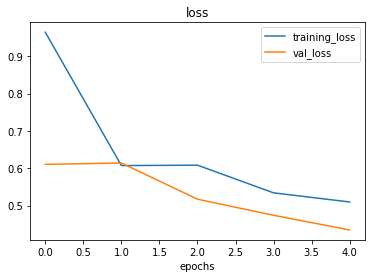

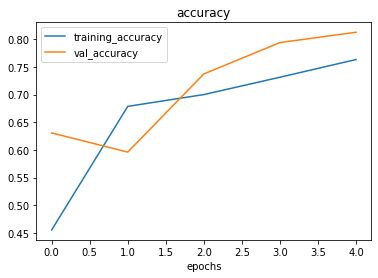

In [75]:
# Check out the models's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [76]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [77]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")                    
])

model_9.compile(loss="sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [78]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 278ms/step - loss: 1.8729 - accuracy: 0.5407 - val_loss: 0.5571 - val_accuracy: 0.7127
Epoch 2/5
47/47 [==============================] - 13s 274ms/step - loss: 0.7309 - accuracy: 0.6733 - val_loss: 1.6090 - val_accuracy: 0.5007
Epoch 3/5
47/47 [==============================] - 13s 275ms/step - loss: 0.8064 - accuracy: 0.5673 - val_loss: 0.5666 - val_accuracy: 0.6987
Epoch 4/5
47/47 [==============================] - 13s 274ms/step - loss: 0.5819 - accuracy: 0.7000 - val_loss: 0.4625 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 13s 274ms/step - loss: 0.5191 - accuracy: 0.7540 - val_loss: 0.4452 - val_accuracy: 0.8060


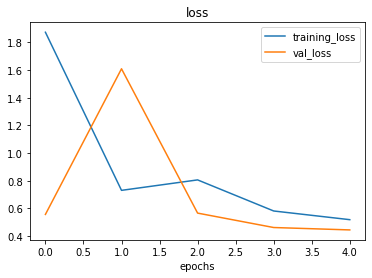

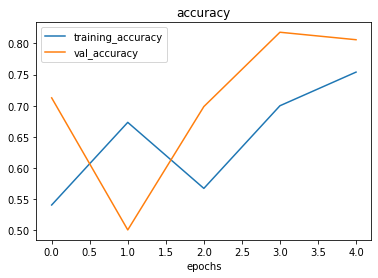

In [79]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [80]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

TypeError: ignored

In [ ]:
# Let's create the model 8 by using the passing models
model_10 = tf.keras.layers.dense